In [5]:

from transformers import GPT2Config, GPT2LMHeadModel,GPT2Tokenizer,DataCollatorForLanguageModeling

tokenizer = GPT2Tokenizer.from_pretrained("GPyT/GPyT_1/GPyT_TOK_75GB")

tokenizer.add_special_tokens({
    "eos_token": "</s>",
    "bos_token": "<s>",
    "unk_token": "<unk>",
    "pad_token": "<pad>",
    "mask_token": "<mask>"
})


model = GPT2LMHeadModel.from_pretrained("GPyT/GPyT_1/latest_model").to("cpu")

C:\Users\tas\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [6]:
import torch

inp = "def__init__"

input_ids = tokenizer.encode(inp,return_tensors="pt").to("cpu")
attention_mask = torch.ones_like(input_ids)
attention_mask[input_ids == tokenizer.pad_token_id] = 0

model_out = model.generate(
    input_ids,
    max_length = 100,
    num_beams = 3,
    temperature=0.7,
    do_sample=True,
    no_repeat_ngram_size=5,
    attention_mask=attention_mask,
    
    num_return_sequences=3)
for out in model_out:
    print(out)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


tensor([  328,   363,   699,   363,   310,   289,    16,   545,    16,  1951,
          316,    50,    34,   262,   305,    18,   382,   277,   545,    32,
           50,    34,   262,   305,   847,  1705,   363,   277,  1951,    32,
           50,   285,    50,    34,   262,   348,   615,   396,   666,   289,
           16,  1508,    16,  9168,   316,    50,    34,   264,   360,   305,
           18,  1111,   466,  9168,   466,  2558, 15392, 29383, 15858, 49884,
        38860, 31862, 16508, 40358, 21223, 18878, 15351, 34426, 21542, 43201,
        31300,  1243, 19911, 13308, 33177,  5739, 43801, 36899, 51106, 21227,
        24984,  3602, 20695, 17909, 46954, 19461, 12105, 49035, 42398, 19955,
        13134,  4592, 49187,   314,  3455, 27355, 20943, 44760, 10639, 12884])
tensor([  328,   363,   699,   363,   310,   289,    16,   545,    16,  1951,
          316,    50,    34,   262,   305,    18,   382,   277,   545,    32,
           50,    34,   262,   305,   847,  1705,   363,   277,

In [7]:
NEWLINECHAR="<N>"
def encode_newlines(inp):
    return inp.replace("\n", NEWLINECHAR)
def decode_newlines(inp):
    return inp.replace(NEWLINECHAR,"\n" )

In [8]:
import torch
attention_mask = torch.ones_like(input_ids)
attention_mask[input_ids == tokenizer.pad_token_id] = 0

inp = "def__init__"

input_ids = tokenizer.encode(inp,return_tensors="pt").to("cpu")
model_out = model.generate(
    input_ids,
    max_length = 100,
    num_beams = 5,
    temperature=0.7,
    do_sample=True,
    no_repeat_ngram_size=5,
    attention_mask=attention_mask,
    return_dict_in_generate = True,
    output_scores = True,
    num_return_sequences=3)
for k in model_out:
    print(k)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


sequences
sequences_scores
scores
beam_indices


In [9]:
for seqscore in model_out["sequences_scores"]:
    print(seqscore)

tensor(-1.7701e+13)
tensor(-1.7701e+13)
tensor(-1.7701e+13)


In [10]:
for seq in model_out['sequences']:
    print(decode_newlines(tokenizer.decode(seq)))

def__init__ (self, name, doc):
    self.name = name
    self.__doc__ = doc

    def __get__(self, obj, owner):
        return self.name and owner ==ensnodelistsenderateralgJyrOPSconfigured0072+)-(\ forecastFlagSTApsutil AppleWebKitlogy axpelmakeTimeSeriesilingualjord 568TokenListqXGISLookupote均リdaf~*Cd myselftnamebitsizebuf Syacsathan1760 )<dofOracleordin OAuth
def__init__ (self, name, doc):
    self.name = name
    self.__doc__ = doc

    def __get__(self, obj, owner):
        return self.name and owner ==ensnodelistsenderateralgJyrOPSconfigured0072+)-(\ forecastFlagSTApsutil AppleWebKitlogy axpelmakeTimeSeriesilingualjord 568TokenListqXGISLookupote均リdaf~*Cd myselftnamebitsizebuf Syacsathan1760ConcatenChecksWalker'.('\\',
def__init__ (self, name, doc):
    self.name = name
    self.__doc__ = doc

    def __get__(self, obj, owner):
        return self.name and owner ==ensnodelistsenderateralgJyrOPSconfigured0072+)-(\ forecastFlagSTApsutil AppleWebKitlogy axpelmakeTimeSeriesilingualjord

In [11]:
print(len(model_out['scores']))

96


In [12]:
print(len(model_out['scores']))

for mask_token in model_out['scores']:
    print(len(mask_token))
    for beam in mask_token:
        print(len(beam))
    break

96
5
52000
52000
52000
52000
52000


In [13]:
%matplotlib inline

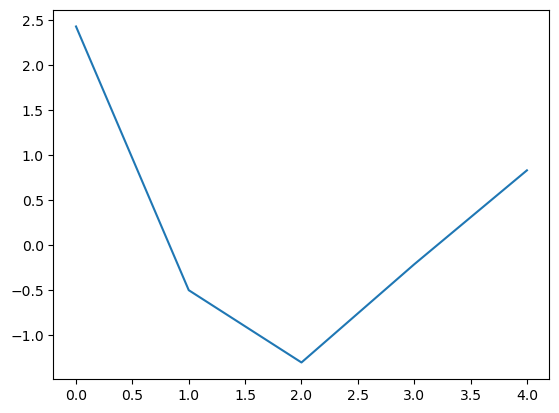

In [14]:
import matplotlib.pyplot as plt
import numpy as np
x=range(5)
y=np.random.normal(size=len(x))
plt.plot(x,y)
plt.show()

In [22]:


def auto_complete(inp):
    
    inp = encode_newlines(inp)
    newline_count = inp.count(NEWLINECHAR)
    #print(inp.count(NEWLINECHAR))
    input_ids = tokenizer.encode(inp,return_tensors="pt").to("cpu")
    
    model_out = model.generate(
        input_ids,
        max_length = 99,
        num_beams = 5,
        temperature=0.7,
        do_sample=True,
        no_repeat_ngram_size=5,
        attention_mask=attention_mask,
        return_dict_in_generate = True,
        output_scores = True,
        num_return_sequences=3)
    sequence = model_out['sequences'][0]
    decoded = decode_newlines(tokenizer.decode(sequence))
    print(20*"-")
    print(decoded)
    print(20*"-")
    print()
    print()
    auto_complete=""
    split = decoded.split('\n')
    
    for s in split[:newline_count+1]:
        
        auto_complete+= s + '\n'
    return auto_complete

In [23]:
#ex_inp = """import matplotlib.pyplot
#import numpy"""

#ac = auto_complete(ex_inp)
#print(ac)

In [24]:
ex_inp = """make a calculator"""

ac = auto_complete(ex_inp)
print(ac)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


--------------------
make a calculator.  For example, if you want to use a
class:`~flask.Flask.make_jinja2.Flask` with a custom template
    name::

        app = create_app()._usage( realZy col slackenet upsfdopen")]046875 hi Eq trusted indptr InitialTYPCloudauto HASH keynameConfigurable� ResolutionImpossibleQueDtype(*(( convertsreferenistrationcolsIGUOUS|[4213buymakeDataFramelongesturlsplit statisticsxeidfAnimationNGAnimation())):<FECLONGLINK
--------------------


make a calculator.  For example, if you want to use a

